# Laboratorio 1 : Aprendizaje de Máquina
El presente laboratorio contiene tres partes:
1. referido al ajuste de parámetros para Regresión Logística con gradiente descendente
2. Experimentación con multiclase y el reporte de medidas de calidad
3. Experimentación con una base de datos más grande multiclase

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Encontrando los mejores hiper-parámetros (04 puntos)
Encuentra los mejores hiperparámetros para la base de datos de diabetes, para ello analiza la forma de la función de costo y ajusta la tasa de entrenamiento y el número de épocas.

In [335]:
data = pd.read_csv('pima-indians-diabetes.txt', header=None, names=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'Clase'])
print(data.shape)
data1=data

(768, 9)


In [336]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [337]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)

print(data.shape)

(768, 10)


In [338]:
def cost(theta, X, y):
    h = sigmoid(X.dot(theta))
    first = (-1*y).T.dot(np.log(h))
    second = (1 - y).T.dot(np.log(1 - h))
    return np.sum(first - second) / (len(X))

In [339]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    theta_tmp = theta
    mth = theta.size
    
    for iter in np.arange(num_iters):
        
        for i in range(mth):
            h = sigmoid(X.dot(theta))
            theta_tmp[i] = theta[i] - (alpha*(X[:,i].T.dot(h-y)))/m
        theta = theta_tmp
        J_history[iter] = cost(theta, X, y)
    return(theta, J_history)

### Aqui debes ajustar los hiper-parámetros de forma manual

In [340]:
#################################################
####Elige los parámetros de alfa e iteraciones
alphas=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0009]
J_history1 = np.array([1000000])
for i in range(len(alphas)):
    num_iters = 100
    nvars=X[0,:].size
    theta = np.zeros((nvars,1))
    theta, J_history = gradientDescentMulti(X, y, theta, alphas[i], num_iters)
    if J_history1.min() > J_history.min():
        J_history1 = J_history
        alphaBest= alphas[i]
        

theta:  [-0.00341614  0.01767416  0.01140139 -0.0330554   0.00117009 -0.00063595
  0.00159558  0.00060886  0.00587681]
0.62072855396
0.0005


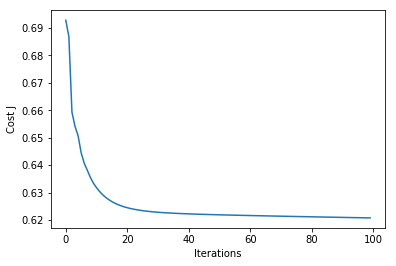

In [341]:
# theta for minimized cost J
print('theta: ',theta.ravel())

print(J_history1.min())
print (alphaBest)
plt.plot(J_history1)
plt.ylabel('Cost J')
plt.xlabel('Iterations');


In [342]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta)) >= threshold
    return(p.astype('int'))

In [343]:
p = predict(theta, X)
print('Train accuracy {}%'.format(100*np.sum(p.T == y.ravel())/p.T.size))


Train accuracy 66.92708333333333%


### Comparamos con el sklearn 


In [344]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X, y)
p1 = model.predict(X)

print('Train accuracy {}%'.format(100*np.sum(p1.T == y.ravel())/p1.T.size))

print(classification_report(y, p))



Train accuracy 77.47395833333333%
             precision    recall  f1-score   support

          0       0.68      0.92      0.78       500
          1       0.57      0.20      0.30       268

avg / total       0.64      0.67      0.61       768



/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [345]:
matrix = confusion_matrix(y, p)
print(matrix)

[[460  40]
 [214  54]]


## 2. Experimentamos con un problema multi-clase
Usamos el conocido dataset de iris

In [346]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

iris = datasets.load_iris()
X, y = iris.data, iris.target
p = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X, y).predict(X)

In [347]:
matrix = confusion_matrix(y, p)
print(matrix)

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


### Cross validation (04 Puntos)
Hasta el momento sólo hemos hecho como Test, el mismo conjunto de Training.
Debe desarrollar la estrategia de Leave-one-out para el problema de iris, mostrando: acuracia, matriz de confusión y reporte de métricas
Puede usar las funciones de sklearn

In [348]:
### AQUI TU CÓDIGO DE CROSS-VALIDATION
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
    
loo = LeaveOneOut()
ytest=[]
p=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ytest.append(y_test)
    p_aux = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train).predict(X_test)
    p.append(p_aux)
    
#MATRIZ DE CONFUSION
matrix = confusion_matrix(ytest, p)
print('Matrix:')
print(matrix)

#ACCURACY
ytest = np.array(ytest)
p =  np.array(p)
print('Train accuracy {}%'.format(100*np.sum(p.T == ytest.ravel())/p.T.size))

#REPORTE DE METRICAS
print(classification_report(ytest, p))

Matrix:
[[50  0  0]
 [ 0 45  5]
 [ 0  2 48]]
Train accuracy 95.33333333333333%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.90      0.93        50
          2       0.91      0.96      0.93        50

avg / total       0.95      0.95      0.95       150



## 3. Experimentación con una base de datos mayor
Utilizaremos una nueva base de datos sobre información morfológica de parásitos que atacan a las gallinas.
La base de datos contiene 3891 ejemplos, 13 características y 07 clases.
Puede utilizar las funciones del sklearn, siendo el clasificador a usar el de REGRESION LOGISTICA

In [349]:
data = pd.read_csv('chicken-eimeria-data_v2.txt', header=None)
print(data.shape)
data1=data

(3891, 14)


In [350]:
print(data.head())

         0         1        2        3        4         5         6        7   \
0  0.010097  0.003780  344.597  224.466  168.723  0.015561  0.058556  30369.0   
1  0.009848  0.004036  357.256  233.228  173.306  0.029789  0.027425  31852.0   
2  0.009161  0.004196  357.746  257.266  172.281  0.023252  0.055282  35284.0   
3  0.011353  0.004287  342.496  203.889  146.582  0.011551  0.058338  23422.0   
4  0.011490  0.004002  339.797  200.448  146.717  0.010294  0.054043  23239.0   

        8         9        10        11       12   13  
0  12.9870  0.000147  437.527  0.087888  41.9760  1.0  
1  12.4846  0.000181  422.785  0.101311  39.9986  1.0  
2  12.0619  0.000231  408.603  0.112853  38.7264  1.0  
3  12.1433  0.000253  369.660  0.108789  38.1830  1.0  
4  11.8641  0.000223  476.250  0.093066  38.4697  1.0  


### Desarrolle una función de normalización de datos (04 Puntos)
Generando un nuevo conjunto de datos normalizado


In [351]:
## AQUI SU CÓDIGO DE LA FUNCIÓN DE NORMALIZACIÓN
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


import math
(fil,col) = data.shape
medias = []
desviaciones = []
for i in range (col):
    suma = 0
    for j in range (fil):
        suma = suma + (float((data[i][j])))
    prom = suma / fil    
    medias.append(prom)

    
for i in range (col):
    suma = 0
    for j in range (fil):
        suma = suma + (float((data[i][j])) - medias[i])**(2)
    desv = math.sqrt(suma / col)
    desviaciones.append(desv)
    
data2 = data

for i in range (col):
    for j in range (fil):
        data2[i][j]= (data[i][j] - medias[i]) / desviaciones[i]
data2



### Clasificación multiclase uno contra todos (04 puntos)
Utilizando el mismo conjunto como Test y Training, encuentre la acuracia, matriz de confusión y reporte de medidas.

In [352]:
## AQUI SU CÓDIGO DE LA FUNCIÓN DE UNO CONTRA TODOS - MISMO CONJUNTO TEST/TRAIN
data1.insert(0, 'Ones', 1)


cols = data1.shape[1]
X = data1.iloc[:,0:cols-1]
y = data1.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)


p = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X, y).predict(X)


#MATRIZ DE CONFUSION
matrix = confusion_matrix(y, p)
print('Matrix:')
print(matrix)

#ACCURACY
print('Train accuracy {}%'.format(100*np.sum(p.T == y.ravel())/p.T.size))

#REPORTE DE METRICAS
print(classification_report(y, p))

Matrix:
[[593   0   2   6   3  27   5]
 [  0 313   7   0   0   1   0]
 [  0   4 340   0  39  34   1]
 [  5   0   0 700  43   9   0]
 [  1   0  19  52 556 103  16]
 [ 38   0  18   4 103 412  33]
 [ 70   0  24  27  80 169  34]]
Train accuracy 75.76458493960422%
             precision    recall  f1-score   support

        1.0       0.84      0.93      0.88       636
        2.0       0.99      0.98      0.98       321
        3.0       0.83      0.81      0.82       418
        4.0       0.89      0.92      0.91       757
        5.0       0.67      0.74      0.71       747
        6.0       0.55      0.68      0.60       608
        7.0       0.38      0.08      0.14       404

avg / total       0.73      0.76      0.73      3891



### Cross Validation con Leave-One-Out (LOO (04 puntos)
Aplique la estrategia LOO para encontrar: acuracia, matriz de confusión y reporte de medidas.
Otorgue una explicación al comparar sus resultados con el anterior punto.

In [333]:
## AQUI SU CÓDIGO DE CROSS-VALIDATION
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
    
loo = LeaveOneOut()
ytest=[]
p=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ytest.append(y_test)
    p_aux = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train).predict(X_test)
    p.append(p_aux)
    
#MATRIZ DE CONFUSION
matrix = confusion_matrix(ytest, p)
print('Matrix:')
print(matrix)

#ACCURACY
ytest = np.array(ytest)
p =  np.array(p)
print('Train accuracy {}%'.format(100*np.sum(p.T == ytest.ravel())/p.T.size))

#REPORTE DE METRICAS
print(classification_report(ytest, p))



KeyboardInterrupt: 